<a href="https://colab.research.google.com/github/taherezzaier/Projet/blob/main/LNP_word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librairies

In [ ]:
import re, string
import pandas as pd
import numpy as np
from collections import defaultdict
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv

--2024-03-25 14:12:42--  https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/plain]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2024-03-25 14:12:43 (89.9 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



Importer data

In [ ]:
df = pd.read_csv('/content/bbc-text.csv')

In [ ]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


Data cleaning

Ajouter une ligne de code pour declarer STOPWORDS

In [ ]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

In [ ]:
df_clean = pd.DataFrame(df.text.apply(lambda x: clean_text(x)))

Lemmatization



Corriger ce code : remplacer english par le modele spacy correspondant (voir tp spacy)

In [ ]:
!python -m spacy validate
!pip install en_core_web_sm

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.7.4) =================
ℹ spaCy installation: /usr/local/lib/python3.10/dist-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.7.2,<3.8.0   3.7.1   ✔



In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

In [ ]:
def lemmatizer(text):
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean["text_lemmatize"] = df_clean.apply(lambda x: lemmatizer(x['text']), axis=1)
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

word frequency

In [ ]:
sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1

sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['say', 'mr', 'year', 'would', 'make', 'also', 'people', 'new', 'one', 'take']

Word2Vec model

Train CBOW Word2Vec Model

In [ ]:
w2v_model = Word2Vec(sentences=sentences, sg=0, min_count=10, workers=4, window =3, epochs = 20)

In [ ]:
print(w2v_model)

Word2Vec<vocab=5364, vector_size=100, alpha=0.025>


Explorer le modèle

Ici nous allons voir les mots les plus similaires au mot economy
Essayez avec d'autres mots

comme vous pouvez le constater :

- word2vec a constitué un vocabulaire à partir de votre corpus
- word2vec a vectorise les mots du corpus
- Si vous mettez un mot qui ne figure pas dans le corpus, il ne va pas le reconnaître
- l'entraînement a ete realise en utilisant gensim
- les similarités sont calculées en utilisant cosine similarity







 Chaque mot du corpus possede un vecteur

In [ ]:
w2v_model.wv['economy']

array([ 0.9281207 ,  0.10044351,  1.3206944 ,  0.53377646,  1.2793566 ,
       -0.9637235 ,  0.44287008, -1.7862084 , -0.7445502 ,  0.717465  ,
       -0.69325656, -1.3452332 , -0.9739103 ,  0.8012242 ,  2.368549  ,
       -3.0694447 , -1.3855093 , -0.7495398 , -2.3699229 , -1.2913648 ,
        0.20231251,  0.37695327, -1.5296232 ,  1.2100688 , -0.29941338,
       -0.33061984, -1.6377549 , -0.56366473,  1.6978803 , -0.47655588,
        1.1285915 ,  0.75801134, -0.05238253, -0.6577868 , -1.1848327 ,
        1.1924739 ,  1.5544199 ,  1.0529929 , -0.88388747,  0.16992024,
        0.3425029 , -1.4935575 , -0.58954453, -0.48397478, -0.56305027,
        3.4353137 ,  0.7537254 ,  1.5334188 , -0.16109467, -0.70914704,
        0.54558444,  0.43545353,  0.01134233, -1.9915975 ,  0.9551296 ,
        0.47818983, -0.53155804, -0.74436605, -0.74842775, -1.3079436 ,
        0.8410095 ,  1.149839  ,  0.10020572,  0.45661762,  1.1251094 ,
        1.6030598 , -0.24119507,  1.1021223 ,  0.19811466,  0.44

Les mots les plus similaires au mot economy

In [ ]:
w2v_model.wv.most_similar(positive=['economy'])

[('economic', 0.6785703897476196),
 ('export', 0.6263391375541687),
 ('moderate', 0.5950570702552795),
 ('gdp', 0.5779871940612793),
 ('growth', 0.5672567486763),
 ('eurozone', 0.5418676733970642),
 ('recession', 0.5374241471290588),
 ('rapid', 0.5281496047973633),
 ('oecd', 0.526297926902771),
 ('pace', 0.5219476222991943)]

ajouter une ligne de code pour calculer la similarite entre 'company', 'business'

In [ ]:
w2v_model.wv.most_similar(positive=['economy', 'business'])

[('carmaker', 0.6118243336677551),
 ('export', 0.5908954739570618),
 ('sector', 0.5746426582336426),
 ('profitable', 0.570242702960968),
 ('rapid', 0.5689757466316223),
 ('economic', 0.5498480796813965),
 ('coal', 0.5471534729003906),
 ('exporter', 0.5454568862915039),
 ('boom', 0.5395857095718384),
 ('growth', 0.5309709310531616)]

In [ ]:
# Calcul de la similarité entre 'company' et 'business'
similar_words = w2v_model.wv.most_similar(positive=[ 'company', 'business'])

print(similar_words)


[('firm', 0.5557947158813477), ('carmaker', 0.5535132884979248), ('consortium', 0.5243539214134216), ('investor', 0.5071496963500977), ('industry', 0.501686155796051), ('unit', 0.5010087490081787), ('asset', 0.4985314905643463), ('fiat', 0.49698737263679504), ('brewer', 0.4934759736061096), ('manufacturer', 0.49032971262931824)]


Representation dans un espace a deux dimensions des mots du vocabulaire

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:

        tokens.append(model.wv[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

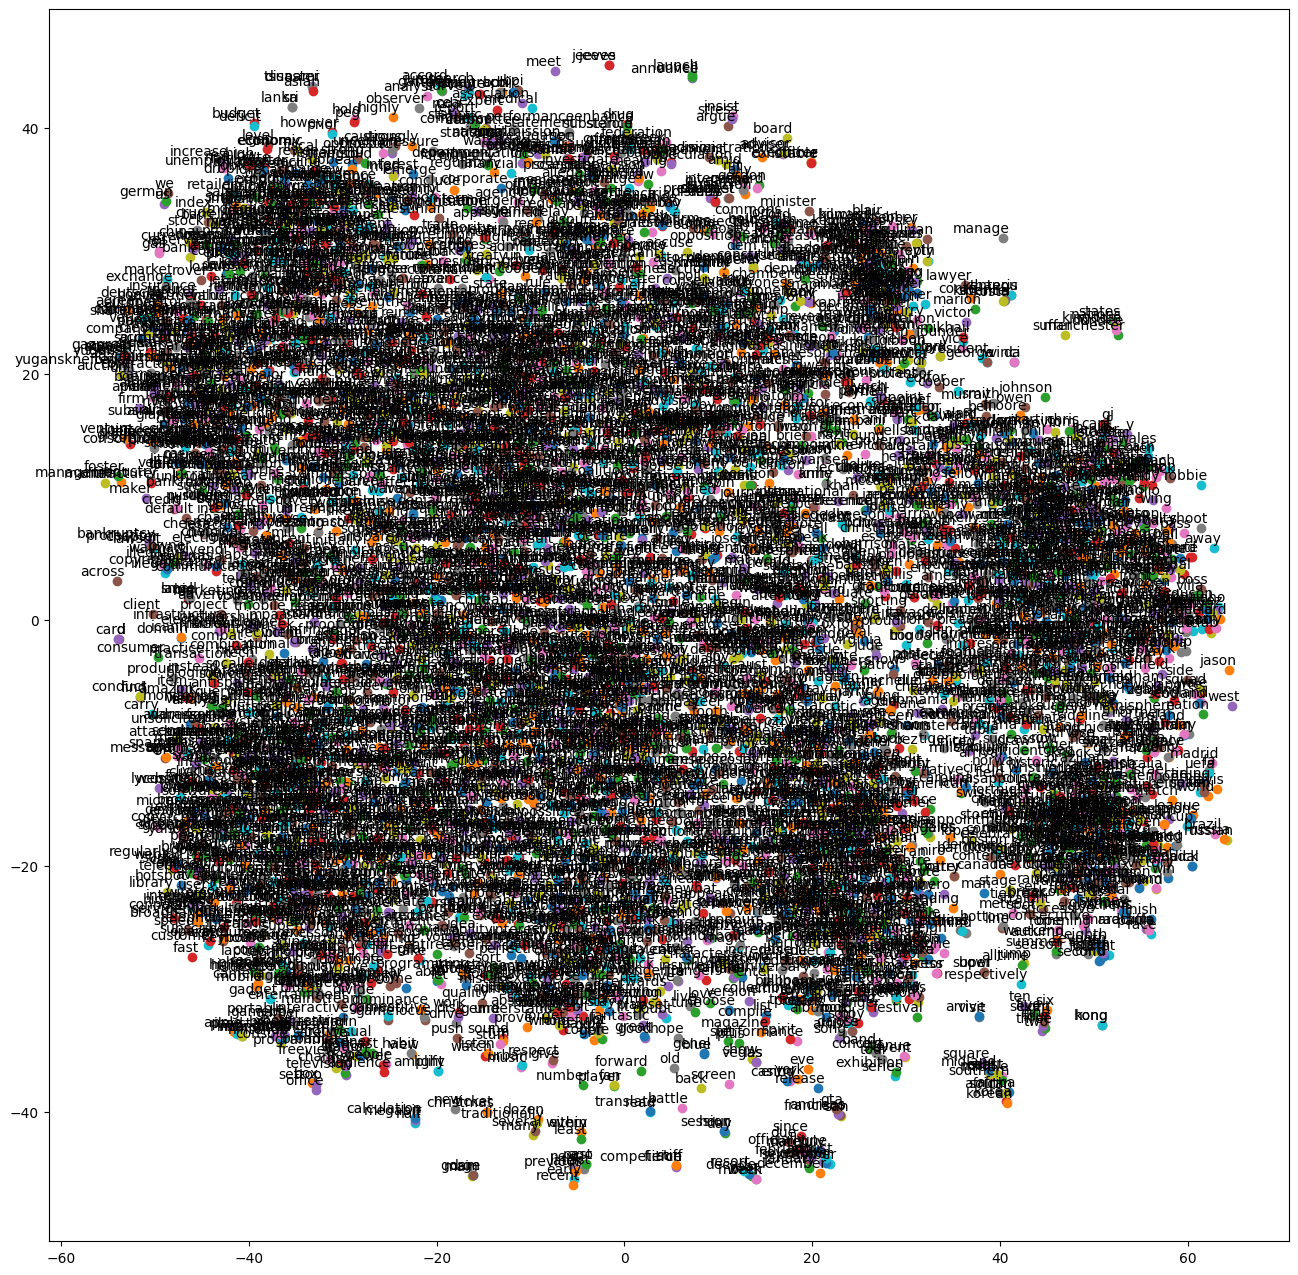

In [ ]:
tsne_plot(w2v_model)

Un autre corpus

Data Import

In [ ]:
import re, string
import pandas as pd
import numpy as np
from collections import defaultdict
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data (1).csv')

In [ ]:
df.head()

,display a 7 day forecast for mumbai
0,show the wind speed trend in bangalore for the...
1,compare the humidity levels between pune and k...
2,what is the uv index in hyderabad this afternoon
3,provide a weekly precipitation forecast for delhi
4,is there a thunderstorm warning for any part o...


Data Cleaning

In [ ]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

In [ ]:
import pandas as pd
def clean_text(text):
    # Implement your text cleaning logic here
    # ...
    return cleaned_text
    df_clean = pd.DataFrame(df['text'].apply(clean_text))


In [ ]:
print(clean_text)

<function clean_text at 0x7b8fd935fac0>


In [ ]:
!python -m spacy validate
!pip install en_core_web_sm

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.7.4) =================
ℹ spaCy installation: /usr/local/lib/python3.10/dist-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.7.2,<3.8.0   3.7.1   ✔



In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

In [ ]:
# Print the text_data variable to ensure it contains the expected data.
print(open('/content/data (1).csv').read())

display a 7 day forecast for mumbai
show the wind speed trend in bangalore for the past month
compare the humidity levels between pune and kolkata today
what is the uv index in hyderabad this afternoon
provide a weekly precipitation forecast for delhi
is there a thunderstorm warning for any part of gujarat today
what was the highest recorded temperature in chennai last year
show the historical rainfall data for kolkata for the last 5 years
will there be fog in lucknow tomorrow morning
compare the temperature difference between bhopal and jaipur
what is the average rainfall in assam during the monsoon season
display a radar map for the current weather conditions in goa
what is the air quality index in chandigarh at this moment
show the sunset time in shimla for the next week
has there been any snowfall in srinagar this week
compare the daytime temperatures of amritsar and ludhiana
what is the expected weather for haryana on christmas day
provide the hourly temperature forecast for nagpu

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:

        tokens.append(model.wv[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()